## <font color='blue'> Convolutional Neural Networks </font>

### Introduction

[Slides](https://docs.google.com/presentation/d/1vk8nROM9U3FFO6VnsNZNUM2Y3VPSeG3kTh20yuY7qRs/edit#slide=id.p1)


![](https://assets-global.website-files.com/614c82ed388d53640613982e/646371e3bdc5ca90dee5331b_convolutional-neural-network%20(1).webp)

Source: https://www.superannotate.com/blog/guide-to-convolutional-neural-networks

### Applications Include

1. **Image Classification**:
   - **Object Recognition**: Identifying objects within an image (e.g., recognizing dogs, cats, cars).
   - **Scene Classification**: Categorizing the scene depicted in an image (e.g., beach, forest, city).

2. **Object Detection**:
   - **Face Detection**: Detecting human faces in images for applications like security, photo tagging, and more.
   - **Pedestrian Detection**: Used in autonomous driving and surveillance systems.

3. **Image Segmentation**:
   - **Semantic Segmentation**: Classifying each pixel in an image into a category (e.g., separating roads, buildings, cars in a cityscape).
   - **Instance Segmentation**: Distinguishing between different instances of objects in an image (e.g., identifying and separating multiple people).

4. **Medical Imaging**:
   - **Disease Diagnosis**: Analyzing medical images (e.g., X-rays, MRIs) to detect diseases like cancer, Alzheimer's, and retinal diseases.
   - **Organ Segmentation**: Identifying and segmenting organs in medical scans for surgical planning and diagnosis.

5. **Self-driving Cars**:
   - **Road Sign Recognition**: Detecting and classifying traffic signs.
   - **Lane Detection**: Identifying lane boundaries on the road.
   - **Obstacle Detection**: Detecting pedestrians, other vehicles, and obstacles.

6. **Facial Recognition and Authentication**:
   - **Face Recognition**: Identifying or verifying a person from an image or video frame.
   - **Emotion Recognition**: Analyzing facial expressions to determine emotions.

7. **Robotics and Automation**:
   - **Object Grasping**: Identifying objects and determining how to grasp them in robotic manipulation.
   - **Navigation**: Helping robots understand their environment for autonomous navigation.

8. **Augmented Reality (AR) and Virtual Reality (VR)**:
   - **Object Tracking**: Tracking objects in real-time to augment digital information onto the real world.
   - **Environment Understanding**: Understanding and mapping the environment for immersive VR experiences.

9. **Natural Language Processing (NLP)**:
   - **Text Classification**: Classifying text into categories (e.g., spam detection, sentiment analysis).
   - **Character Recognition**: Recognizing handwritten or printed text from images (e.g., OCR).

10. **Art and Creativity**:
    - **Style Transfer**: Applying the style of one image to another (e.g., making a photo look like a painting).
    - **Image Generation**: Creating new images from scratch (e.g., GANs for generating realistic photos).

11. **Super-Resolution and Image Enhancement**:
    - **Image Denoising**: Removing noise from images to enhance quality.
    - **Image Super-Resolution**: Increasing the resolution of images for better clarity and detail.


### Code Applications
---

#### Example 1 - Fashion MNIST

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [51]:
# Download and load the training and test datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# you can specify batsh size for the test if you plan to check the results at each time of the training process
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [21]:
for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Shape of X [N, C, H, W]: torch.Size([60, 1, 28, 28])
Shape of y: torch.Size([60]) torch.int64


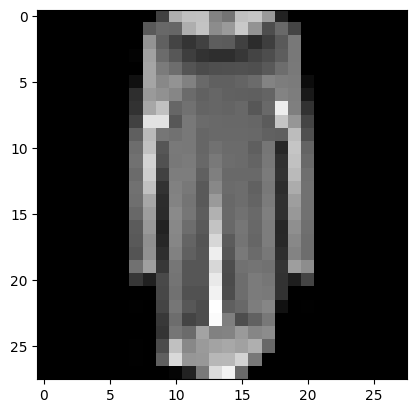

Dress


In [31]:
# look at some sample images
i = 34
plt.imshow(X[i,0,:],cmap='gray')
plt.show()
print(class_names[y[i].item()])

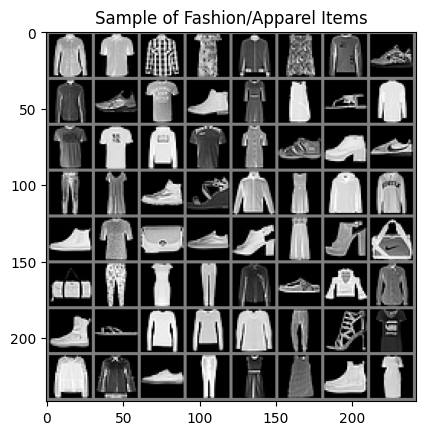

First Label: Shirt


In [52]:
# Function to display images
def imshow(img, label):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Sample of Fashion/Apparel Items')
    #plt.title(f'First Item: {class_names[label]}')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images), labels[0])

# Display the name of the label for the first image in the batch
print(f'First Label: {class_names[labels[0]]}')

#### What happens if we do not use convolutions/feature extractions

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # output
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [38]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [35]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 50 == 0:
            loss, current = loss.item(), (batch + 1)*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [36]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

#### The benefit of convolutions:

In [ ]:
# Define the convolutional model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 50, kernel_size=3, padding=1),
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(50, 100, kernel_size=3),
            nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.fc1 = nn.Linear(100*6*6, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = CNN().to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


In [33]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 90.53%


In [39]:
epochs = 8
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.317343  [   60/60000]
loss: 0.231959  [ 3060/60000]
loss: 0.244312  [ 6060/60000]
loss: 0.281115  [ 9060/60000]
loss: 0.236354  [12060/60000]
loss: 0.261460  [15060/60000]
loss: 0.214243  [18060/60000]
loss: 0.136579  [21060/60000]
loss: 0.212843  [24060/60000]
loss: 0.381205  [27060/60000]
loss: 0.274324  [30060/60000]
loss: 0.379989  [33060/60000]
loss: 0.127020  [36060/60000]
loss: 0.334019  [39060/60000]
loss: 0.230370  [42060/60000]
loss: 0.228620  [45060/60000]
loss: 0.198073  [48060/60000]
loss: 0.182649  [51060/60000]
loss: 0.311502  [54060/60000]
loss: 0.184986  [57060/60000]
Test Error: 
 Accuracy: 90.8%, Avg loss: 0.259057 

Epoch 2
-------------------------------
loss: 0.206381  [   60/60000]
loss: 0.182129  [ 3060/60000]
loss: 0.270273  [ 6060/60000]
loss: 0.239762  [ 9060/60000]
loss: 0.195614  [12060/60000]
loss: 0.351690  [15060/60000]
loss: 0.316848  [18060/60000]
loss: 0.195195  [21060/60000]
loss: 0.115826  [24060/60000

#### Exercise: Apply similar designs for the US Postal Service data (MNIST), and the handwritten letters, EMNIST data.

In [46]:
# Download and load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# you can specify batsh size for the test if you plan to check the results at each time of the training process
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5079224.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134439.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1257690.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5486903.45it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



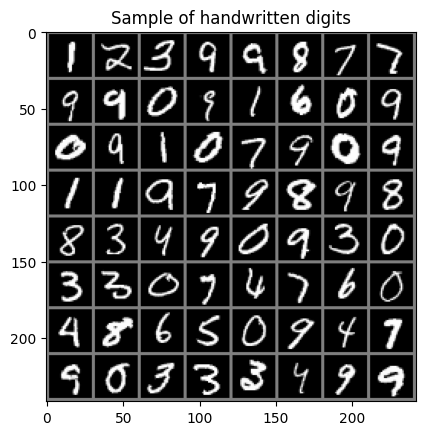

First Label: 1


In [50]:
# Function to display images
def imshow(img, label):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Sample of handwritten digits')
    #plt.title(f'First Item: {label}')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images), labels[0])

# Display the name of the label for the first image in the batch
print(f'First Label: {labels[0]}')

#### Exercise: Develop a CNN for the [CiFar10](https://www.cs.toronto.edu/~kriz/cifar.html) data.